# Food vs. Non-Food Image Classifier
***
### Food
<img src="./Food/1_514.jpg" alt="Image of food" title="Food" />

### Non-Food
<img src="./NotFood/000000414795.jpg" alt="Image of non-food" title="Non-Food" />

## Notebook description:
The following Notebook was created in order to classify images into two categories: Food, and Non-Food. It relies on Keras, a high-level neural networks API.

### Approach:
The following implementation compares the performance of a Convolutional Neural Network with the following parameters:

-  Number of layers: 1, 2, 3
-  Learning rate: $1e^{-3}$
-  Batch Size: 32, 100
-  Epochs: 20
-  Image Size: 32x32px, 64x64px
-  Number of kernels in a layer: 10, 20 in the first layer; 50, 100 in the second layer
-  Kernel size: 5x5 small image; 7x7 large image

Each layer follows CONV -> RELU -> MAXPOOL

## Datasets:
The datasets is split three-way:
Training: 60%
Test: 20%
Validation: 20%

Images used in the training/testing/validation are a mix of publicly available datasets.

## Data Preprocessing:
The dataset has been preprocessed by resizing the images into 32x32 and 64x64px. The images remain as RGB, not gray-scale. The argument for keeping the representation as RGB is supported by Kiyoharu Aizawa, in the paper "Food Detection and Recognition Using Convolutional Neural Network," and can be found __[here](https://www.researchgate.net/publication/266357771_Food_Detection_and_Recognition_Using_Convolutional_Neural_Network)__.

Since the dataset used in training is sizable (~5.2k Food, ~4.5k Non-Food), there is no need for augumentation. However, on a limited dataset it would be beneficial to apply augumentation with Keras ImageDataGenerator, using the following techniques:
-  rotation
-  width/height shift
-  sheer range
-  zoom range
-  horizontal flip
***
# Results:
Best model is the one with the following parameters:


## 2 Convolutional Layers

## 3 Convolutional Layers

***
# Code implementation:
## Data preprocessing:

In [37]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import numpy as np
import random
import cv2

DATASET_FOOD = './dataset/Food'
DATASET_NONFOOD = './dataset/NotFood/'

# load dataset
foodImages = list(paths.list_images(DATASET_FOOD))
nonFoodImages  = list(paths.list_images(DATASET_NONFOOD))

X32 = []
Y32 = []

X64 = []
Y64 = []

# X128 = []
# Y128 = []

# Resize the images and convert them to array
for image in foodImages:
    img = cv2.imread(image)
    img32 = cv2.resize(img, (32, 32))
    img64 = cv2.resize(img, (64, 64))
#     img128 = cv2.resize(img, (128, 128))
    
    X32.append(img_to_array(img32))
    Y32.append(1)
    
    X64.append(img_to_array(img64))
    Y64.append(1)
    
#     X128.append(img_to_array(img128))
#     Y128.append(1)
    
for image in nonFoodImages:
    img = cv2.imread(image)
    img32 = cv2.resize(img, (32, 32))
    img64 = cv2.resize(img, (64, 64))
#     img128 = cv2.resize(img, (128, 128))

    X32.append(img_to_array(img32))
    Y32.append(0)
    
    X64.append(img_to_array(img64))
    Y64.append(0)
    
#     X128.append(img_to_array(img128))
#     Y128.append(0)

smallImg = list(zip(X32, Y32))
random.shuffle(smallImg)
X32, Y32 = zip(*smallImg)

largeImg = list(zip(X64, Y64))
random.shuffle(largeImg)
X64, Y64 = zip(*largeImg)

# extraLargeImg = list(zip(X128, Y128))
# random.shuffle(extraLargeImg)
# X128, Y128 = zip(*extraLargeImg)

# turn the RGB values into intensity in the range 0 to 1
X32 = np.array(X32, dtype="float") / 255.0
Y32 = np.array(Y32)

X64 = np.array(X64, dtype="float") / 255.0
Y64 = np.array(Y64)

# X128 = np.array(X128, dtype="float") / 255.0
# Y128 = np.array(Y128)

# Split the datasets into training/testing/validation
(trainX32, testX32, trainY32, testY32) = train_test_split(X32, Y32, test_size=0.40, random_state=42)
(testX32, valX32, testY32, valY32) = train_test_split(testX32, testY32, test_size=0.50, random_state=22)

# convert the labels from integers to vectors
trainY32 = to_categorical(trainY32, num_classes=2)
testY32 = to_categorical(testY32, num_classes=2)
valY32 = to_categorical(valY32, num_classes=2)

(trainX64, testX64, trainY64, testY64) = train_test_split(X64, Y64, test_size=0.40, random_state=42)
(testX64, valX64, testY64, valY64) = train_test_split(testX64, testY64, test_size=0.50, random_state=22)

# convert the labels from integers to vectors
trainY64 = to_categorical(trainY64, num_classes=2)
testY64 = to_categorical(testY64, num_classes=2)
valY64 = to_categorical(valY64, num_classes=2)

# (trainX128, testX128, trainY128, testY128) = train_test_split(X128, Y128, test_size=0.40, random_state=42)
# (testX128, valX128, testY128, valY128) = train_test_split(testX128, testY128, test_size=0.50, random_state=22)

# Implementation
## 1 Convolutional Layer

In [98]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.optimizers import Adam
import matplotlib.pyplot as plt

class OneLayerNN:
    @staticmethod
    def build(width, height, depth, classes, kernelSize, layerSize=20):
        # initialize the model
        model = Sequential()

        # depth=3 for RGB, depth=1 for grayscale
        # default for Tensorflow
        inputShape = (height, width, depth)

        # change input shapre format in case we're using "channel first"
        if K.image_data_format() == "channels_first":
            # depth=3 for RGB, depth=1 for grayscale
            # default for non-Tensorflow
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        # 20 kernels, each of size kernelSize x kernelSize px
        model.add(Conv2D(layerSize, (kernelSize, kernelSize), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of Fully Connected => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

EPOCHS = 10
IMG_SIZES = [32, 64]
KERNEL_SIZES = [5, 7]
LEARNING_RATE = 1e-3
BATCH_SIZES = [32, 100]
NUMBER_OF_KERNELS_ONE = [10, 20]

History = []

imageAugumentation = ImageDataGenerator(
    rotation_range=30, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

for kernel_size in KERNEL_SIZES:
    for batchSize in BATCH_SIZES:
        for kernelNum in NUMBER_OF_KERNELS_ONE:
            print('\nKernel Size: %i | Batch Size: %i | Size of the layer: %i' % (kernel_size, batchSize, kernelNum))
            adam = Adam(lr=LEARNING_RATE, decay=LEARNING_RATE/EPOCHS)
            model = OneLayerNN()
            
            model = model.build(width=IMG_SIZES[0], height=IMG_SIZES[0], depth=3, classes=2, kernelSize=kernel_size, layerSize=kernelNum)
            model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
#             hist = model.fit(x=trainX32, y=trainY32, batch_size=batchSize, epochs=EPOCHS,
#                                 verbose=1, callbacks=None, validation_data=(testX32, testY32))
            
            hist = model.fit_generator(imageAugumentation.flow(trainX32, trainY32, batch_size=batchSize),
                                validation_data=(testX32, testY32), steps_per_epoch=len(trainX32) // batchSize,
                                epochs=EPOCHS, verbose=1)
            score = model.evaluate(x=valX32, y=valY32, batch_size=batchSize, verbose=1, sample_weight=None)
            print("Validation accuracy: %.3f" % score[1])
            History.append([kernel_size, batchSize, kernelNum, hist, 1.0 - hist.history['acc'][-1], 1.0 - score[1]])
            
#             model = OneLayerNN()
#             model = model.build(width=IMG_SIZES[1], height=IMG_SIZES[1], depth=3, classes=2, kernelSize=kernel_size, layerSize=kernelNum)
#             model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
#             History.append(model.fit(x=trainX64, y=trainY64, batch_size=batchSize, epochs=EPOCHS,
#                                 verbose=1, callbacks=None, validation_data=(testX64, testY64)))


Kernel Size: 5 | Batch Size: 32 | Size of the layer: 10
Epoch 1/10
222/222 [==============================] - 15s - loss: 0.3856 - acc: 0.8371 - val_loss: 0.2756 - val_acc: 0.8864
Epoch 2/10
222/222 [==============================] - 13s - loss: 0.2839 - acc: 0.8794 - val_loss: 0.2339 - val_acc: 0.8998
Epoch 3/10
222/222 [==============================] - 14s - loss: 0.2546 - acc: 0.8967 - val_loss: 0.2653 - val_acc: 0.8889
Epoch 4/10
222/222 [==============================] - 16s - loss: 0.2431 - acc: 0.9007 - val_loss: 0.2895 - val_acc: 0.8834
Epoch 5/10
222/222 [==============================] - 16s - loss: 0.2402 - acc: 0.9013 - val_loss: 0.1991 - val_acc: 0.9192
Epoch 6/10
222/222 [==============================] - 16s - loss: 0.2145 - acc: 0.9108 - val_loss: 0.1984 - val_acc: 0.9217
Epoch 7/10
222/222 [==============================] - 15s - loss: 0.2250 - acc: 0.9030 - val_loss: 0.1952 - val_acc: 0.9171
Epoch 8/10
222/222 [==============================] - 15s - loss: 0.2103 - 

Epoch 1/10
71/71 [==============================] - 16s - loss: 0.5545 - acc: 0.7552 - val_loss: 0.3840 - val_acc: 0.8316 - - ETA: 5s - l
Epoch 2/10
71/71 [==============================] - 15s - loss: 0.3488 - acc: 0.8578 - val_loss: 0.3028 - val_acc: 0.8678
Epoch 3/10
71/71 [==============================] - 15s - loss: 0.3008 - acc: 0.8689 - val_loss: 0.3239 - val_acc: 0.8590
Epoch 4/10
71/71 [==============================] - 14s - loss: 0.2626 - acc: 0.8895 - val_loss: 0.2447 - val_acc: 0.8931
Epoch 5/10
71/71 [==============================] - 14s - loss: 0.2590 - acc: 0.8941 - val_loss: 0.2283 - val_acc: 0.8977
Epoch 6/10
71/71 [==============================] - 14s - loss: 0.2469 - acc: 0.8978 - val_loss: 0.2171 - val_acc: 0.9036
Epoch 7/10
71/71 [==============================] - 14s - loss: 0.2291 - acc: 0.9072 - val_loss: 0.2114 - val_acc: 0.9078
Epoch 8/10
71/71 [==============================] - 14s - loss: 0.2231 - acc: 0.9055 - val_loss: 0.2423 - val_acc: 0.8990
Epoch 9/

Kernel Size: 5 | Batch Size: 32 | Size of the layer: 10
Train accuracy: 0.914
Validation accuracy: 0.921
Good Fit!
Kernel Size: 5 | Batch Size: 32 | Size of the layer: 20
Train accuracy: 0.924
Validation accuracy: 0.927
Good Fit!
Kernel Size: 5 | Batch Size: 100 | Size of the layer: 10
Train accuracy: 0.916
Validation accuracy: 0.900
Overfitting!
Kernel Size: 5 | Batch Size: 100 | Size of the layer: 20
Train accuracy: 0.906
Validation accuracy: 0.889
Overfitting!
Kernel Size: 7 | Batch Size: 32 | Size of the layer: 10
Train accuracy: 0.920
Validation accuracy: 0.920
Good Fit!
Kernel Size: 7 | Batch Size: 32 | Size of the layer: 20
Train accuracy: 0.911
Validation accuracy: 0.924
Good Fit!
Kernel Size: 7 | Batch Size: 100 | Size of the layer: 10
Train accuracy: 0.904
Validation accuracy: 0.921
Good Fit!
Kernel Size: 7 | Batch Size: 100 | Size of the layer: 20
Train accuracy: 0.904
Validation accuracy: 0.923
Good Fit!
Best model has accuracy 0.927.
Kernel Size: 5 | Batch Size: 32 | Size 

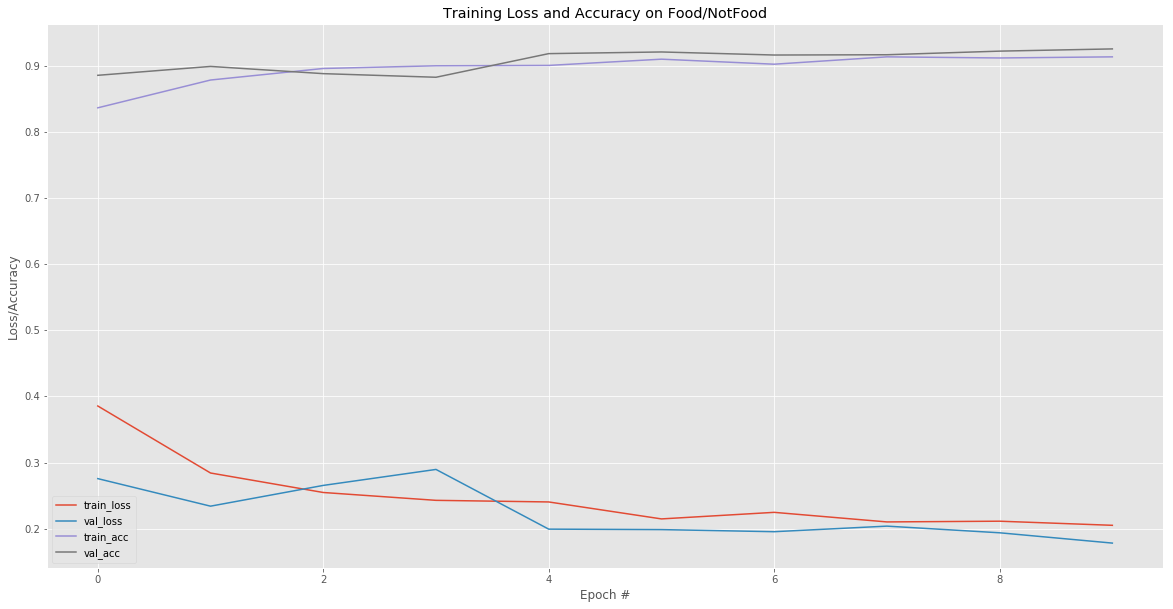

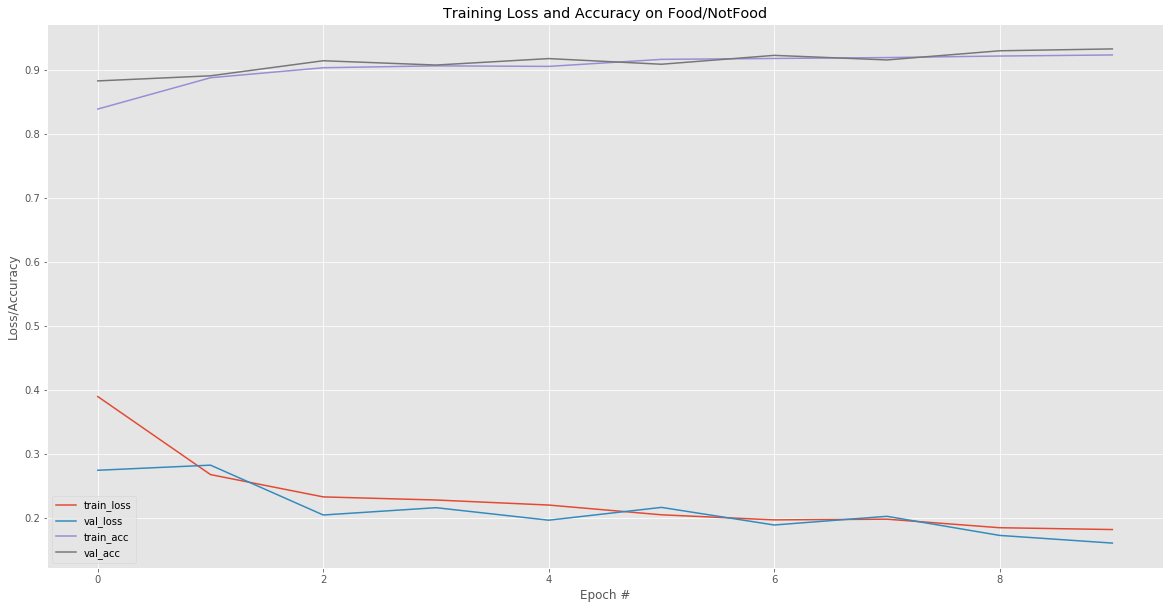

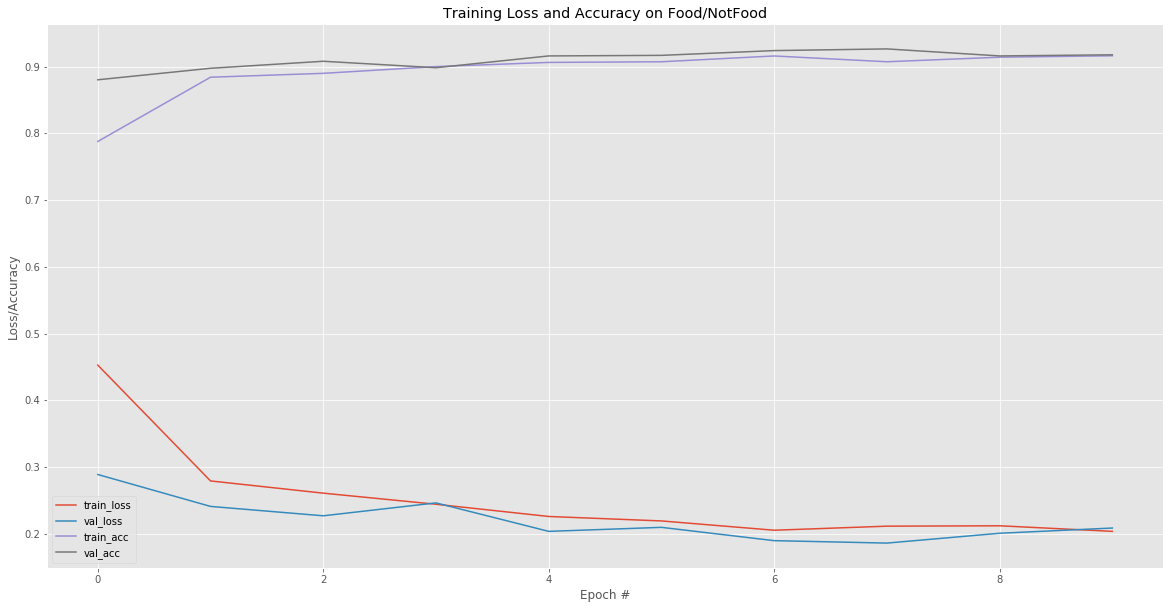

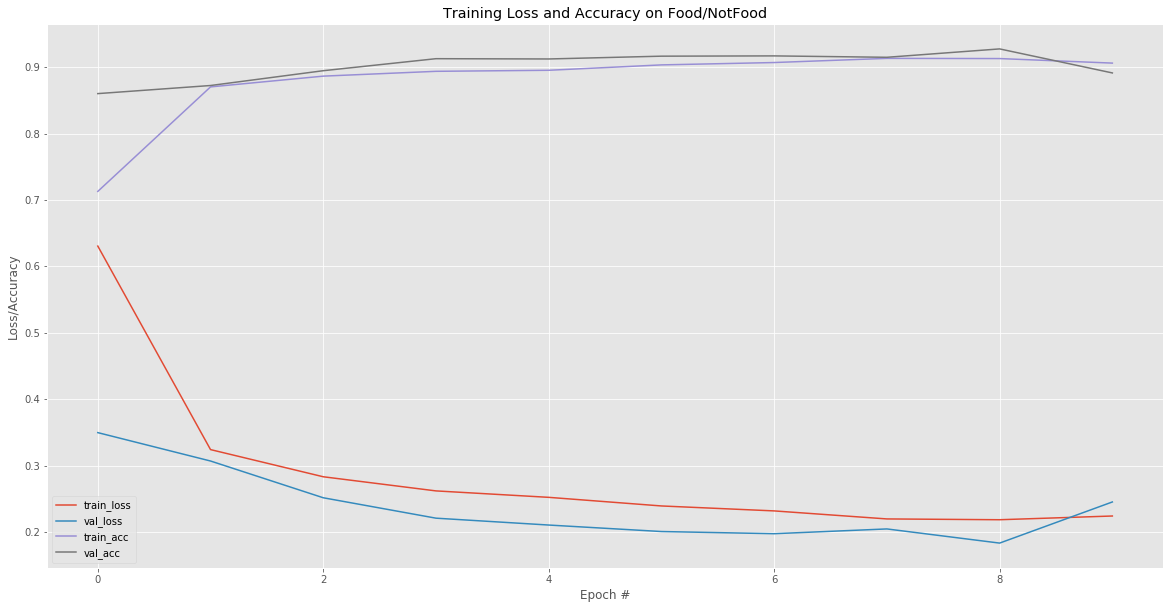

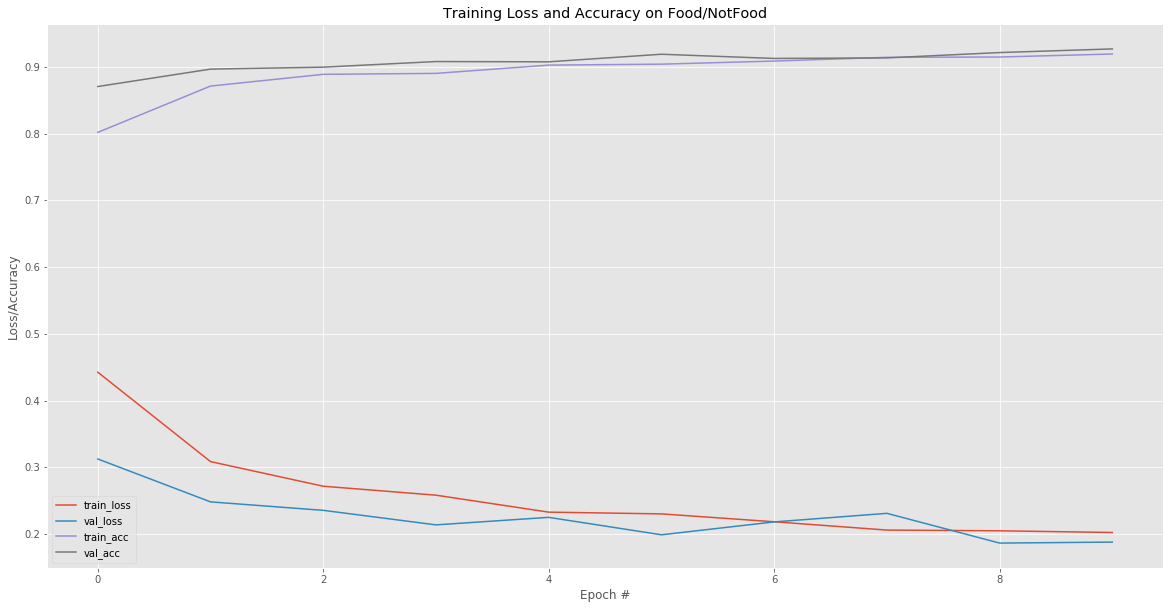

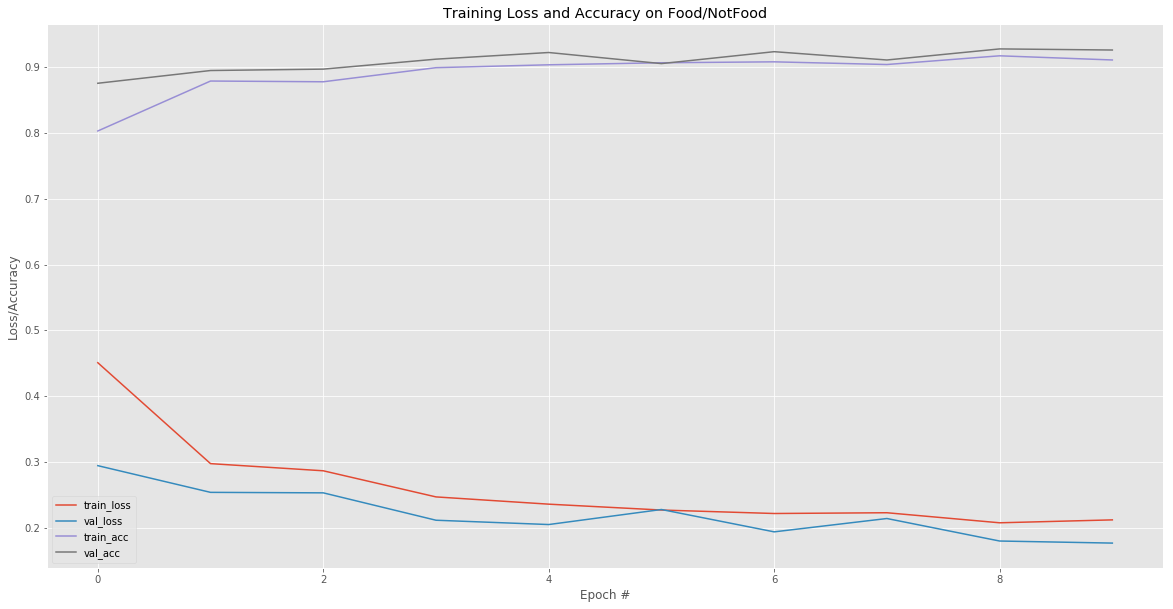

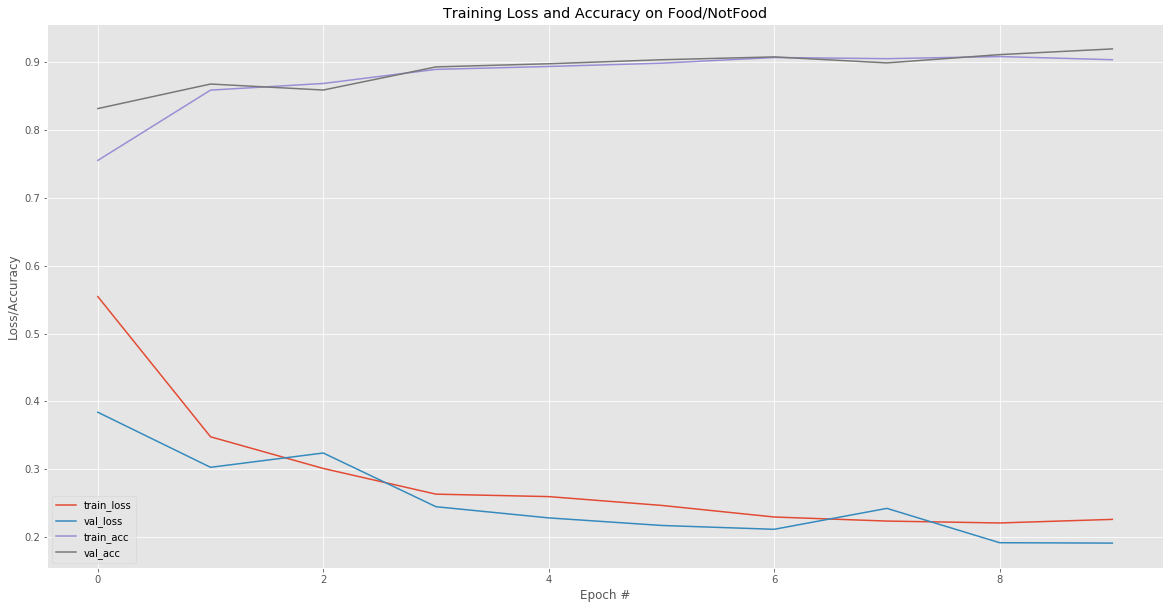

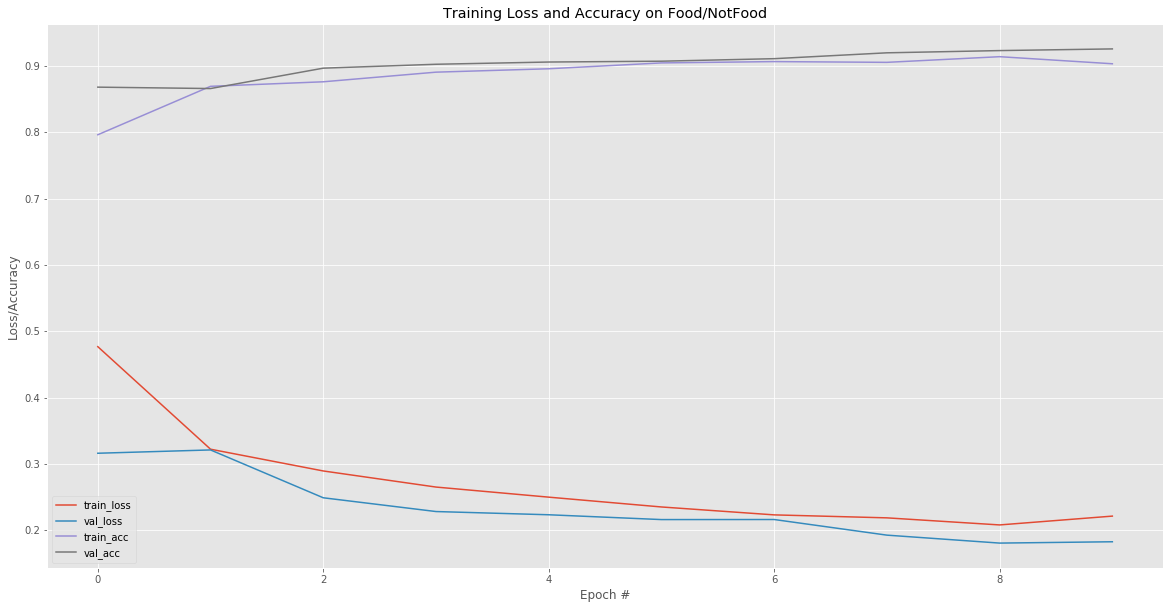

In [101]:
maxAccuracy = 0.0
bestParameters = [0, 0, 0]

for hist in History:
    # kernel_size, batchSize, kernelNum, hist, 1.0 - hist[-1]['accuracy'], 1.0 - score[1]
    print('Kernel Size: %i | Batch Size: %i | Size of the layer: %i' % (hist[0], hist[1], hist[2]))
    print('Train accuracy: %.3f' % (1.0-hist[4]))
    print('Validation accuracy: %.3f' % (1.0-hist[5]))
    
    if (1.0-hist[5] > maxAccuracy):
        maxAccuracy = 1.0-hist[5]
        bestParameters = [hist[0], hist[1], hist[2]]
        
    # if training error > validation error
    if (hist[4] > hist[5]):
        print("Good Fit!")
    if (hist[5] > hist[4]):
        print("Overfitting!")
        
    plt.style.use("ggplot")
    plt.figure(figsize=(20,10))
    plt.subplot()
    plt.plot(np.arange(0, EPOCHS), hist[3].history["loss"], label="train_loss")
    plt.plot(np.arange(0, EPOCHS), hist[3].history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, EPOCHS), hist[3].history["acc"], label="train_acc")
    plt.plot(np.arange(0, EPOCHS), hist[3].history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy on Food/NotFood")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    
print("Best model has accuracy %.3f.\nKernel Size: %i | Batch Size: %i | Size of the layer: %i" % (maxAccuracy, bestParameters[0], bestParameters[1], bestParameters[2]))

In [ ]:
class TwoLayerNN:
    @staticmethod
    def build(width, height, depth, classes, kernelSize, layerOneSize=20, layerTwoSize=50):
        # initialize the model
        model = Sequential()

        # depth=3 for RGB, depth=1 for grayscale
        # default for Tensorflow
        inputShape = (height, width, depth)

        # change input shapre format in case we're using "channel first"
        if K.image_data_format() == "channels_first":
            # depth=3 for RGB, depth=1 for grayscale
            # default for non-Tensorflow
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        # 20 kernels, each of size kernelSize x kernelSize px
        model.add(Conv2D(layerOneSize, (kernelSize, kernelSize), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(layerTwoSize, (kernelSize, kernelSize), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of Fully Connecter => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model
    
NUMBER_OF_KERNELS_TWO = [50, 100]

History2 = []

for kernel_size in KERNEL_SIZES:
    for batchSize in BATCH_SIZES:
        for kernelNum in NUMBER_OF_KERNELS_ONE:
            for kernelNum2 in NUMBER_OF_KERNELS_TWO:
                print('Kernel Size: %i | Batch Size: %i | Size of layer one: %i | Size of layer two: %i' % (kernel_size, batchSize, kernelNum, kernelNum2))
                adam = Adam(lr=LEARNING_RATE, decay=LEARNING_RATE/EPOCHS)
                model = TwoLayerNN()

                model = model.build(width=IMG_SIZES[0], height=IMG_SIZES[0], depth=3, classes=2, kernelSize=kernel_size, layerOneSize=kernelNum, layerTwoSize=kernelNum2)
                model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
                hist = model.fit_generator(imageAugumentation.flow(trainX32, trainY32, batch_size=batchSize),
                                validation_data=(testX32, testY32), steps_per_epoch=len(trainX32) // batchSize,
                                epochs=EPOCHS, verbose=1)
                score = model.evaluate(x=valX32, y=valY32, batch_size=batchSize, verbose=1, sample_weight=None)
                print("Validation accuracy: %.3f" % score[1])
                score = model.evaluate(x=valX32, y=valY32, batch_size=batchSize, verbose=1, sample_weight=None)
                History2.append([kernel_size, batchSize, kernelNum, kernelNum2, hist, 1.0 - hist.history['acc'][-1], 1.0 - score[1]])

Kernel Size: 5 | Batch Size: 32 | Size of layer one: 10 | Size of layer two: 50
Epoch 1/10
222/222 [==============================] - 22s - loss: 0.4197 - acc: 0.8145 - val_loss: 0.2967 - val_acc: 0.8687
Epoch 2/10
222/222 [==============================] - 21s - loss: 0.2880 - acc: 0.8798 - val_loss: 0.2315 - val_acc: 0.8998
Epoch 3/10
222/222 [==============================] - 21s - loss: 0.2536 - acc: 0.8901 - val_loss: 0.2169 - val_acc: 0.9091
Epoch 4/10
222/222 [==============================] - 23s - loss: 0.2386 - acc: 0.8986 - val_loss: 0.1918 - val_acc: 0.9171
Epoch 5/10
222/222 [==============================] - 23s - loss: 0.2224 - acc: 0.9072 - val_loss: 0.1962 - val_acc: 0.9230
Epoch 6/10
222/222 [==============================] - 23s - loss: 0.2047 - acc: 0.9127 - val_loss: 0.2062 - val_acc: 0.9167
Epoch 7/10
222/222 [==============================] - 24s - loss: 0.2001 - acc: 0.9231 - val_loss: 0.1747 - val_acc: 0.9263
Epoch 8/10
222/222 [==============================] 

In [ ]:
for hist in History2:
    # kernel_size, batchSize, kernelNum, hist, 1.0 - hist[-1]['accuracy'], 1.0 - score[1]
    print('Kernel Size: %i | Batch Size: %i | Size of layer one: %i | Size of layer two: %i' % (hist[0], hist[1], hist[2], hist[3]))
    print('Validation accuracy: %d' % (1.0 - hist[6]))
    # if training error > validation error
    if (hist[5] > hist[6]):
        print("Good Fit!")
    if (hist[6] > hist[5]):
        print("Overfitting!")
        
    plt.style.use("ggplot")
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(0, EPOCHS), hist[4].history["loss"], label="train_loss")
    plt.plot(np.arange(0, EPOCHS), hist[4].history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, EPOCHS), hist[4].history["acc"], label="train_acc")
    plt.plot(np.arange(0, EPOCHS), hist[4].history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy on Food/NotFood")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")